In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter


In [2]:

algorithm = 'mnb'
acc = '88'

year = "2022"
month = "february"

dataset_dir = 'sentiment140'
# dataset_dir = 'imdb'
# dataset_dir = 'coronaNLP'

# n_gram = (1, 1)
# n_gram = (1, 2)
n_gram = (2, 2)



In [3]:

vectorizer_path = f"./vectors/vectorizer_{dataset_dir}_{n_gram}.pkl"

model_path = f"./models/{algorithm.lower()}_{dataset_dir}_{acc}_{n_gram}.pkl"

# already processed
df = pd.read_csv(f'./{year}-data/covid-{month}.csv', delimiter=',')

df = df.drop_duplicates()

df = df[['tweet', 'sentiment']]

tfidf = joblib.load(vectorizer_path)

model = joblib.load(model_path)


In [4]:
model

Pipeline(steps=[('clf', MultinomialNB(alpha=1))])

In [5]:

tfidf.vocabulary_

{'one review': 90573,
 'review mention': 104914,
 'mention watch': 80225,
 'watch 1': 135625,
 'episod youll': 39203,
 'youll hook': 143020,
 'exact happen': 41357,
 'mebr br': 79718,
 'br first': 17046,
 'first thing': 48655,
 'thing struck': 125378,
 'scene violenc': 108451,
 'set right': 112550,
 'right word': 105426,
 'word go': 140069,
 'faint heart': 43229,
 'pull punch': 100237,
 'drug sex': 35210,
 'sex violenc': 112852,
 'wordbr br': 140147,
 'br call': 16634,
 'maximum secur': 79137,
 'focus main': 49274,
 'prison cell': 99109,
 'front face': 50664,
 'never far': 86783,
 'awaybr br': 10013,
 'br would': 18338,
 'would say': 141553,
 'say main': 107409,
 'main appeal': 76661,
 'show due': 113897,
 'due fact': 35278,
 'goe show': 54641,
 'show wouldnt': 114359,
 'wouldnt dare': 141708,
 'pretti pictur': 98940,
 'pictur paint': 95532,
 'mainstream audienc': 76746,
 'mess around': 80282,
 'around first': 8351,
 'first episod': 48406,
 'episod ever': 39051,
 'ever saw': 40615,
 'c

In [6]:
tfidf.idf_

array([8.12252386, 9.61417873, 8.97818997, ..., 9.86549316, 9.41350804,
       9.61417873])

In [7]:

X = df.iloc[:, 0].fillna(' ')

tweets = X

num_of_tweets_analyzed = len(tweets)

In [15]:

y_pred = tfidf.transform(X)
y_pred

<9156x143417 sparse matrix of type '<class 'numpy.float64'>'
	with 13723 stored elements in Compressed Sparse Row format>

In [18]:

predictions = model.predict(y_pred)
predictions

array([0, 1, 0, ..., 1, 1, 0])

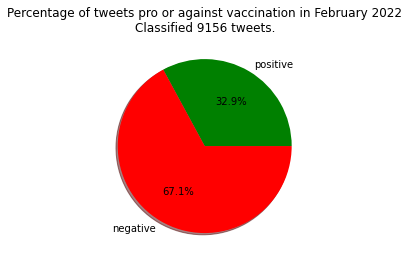

In [19]:

# saving tweets to csv
tweets.to_csv(f'./analysis/tweets-{month}-{year}.csv')
# saving sentiment predictions to csv
np.savetxt(f'./analysis/predictions-{month}-{year}.csv',
           predictions, delimiter=',', fmt=('%s'))

# adding sentiment column to the beginning
df = pd.read_csv(f'./analysis/predictions-{month}-{year}.csv', header=None)
df.rename(columns={0: 'sentiment'}, inplace=True)
# save to new csv file
df.to_csv(f'./analysis/predictions-{month}-{year}.csv', index=False)

# merging tweets and predictions
filenames = [f'./analysis/tweets-{month}-{year}.csv',
             f'./analysis/predictions-{month}-{year}.csv']
dfs = []
for filename in filenames:
    # read the csv, making sure the first two columns are str
    df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
    # change the column names so they won't collide during concatenation
    df.columns = [filename + str(cname) for cname in df.columns]
    dfs.append(df)

# concatenate them horizontally
merged = pd.concat(dfs, axis=1)
# write it out
merged.to_csv(f"./analysis/merged-{month}-{year}.csv", header=None, index=None)

df = pd.read_csv(f'./analysis/merged-{month}-{year}.csv')

labels = ['negative', 'positive']

title_type = df.groupby('sentiment').agg('count')

type_labels = ['positive', 'negative']
type_counts = title_type.tweet.sort_values()

colors = ['g', 'r']

plt.subplot(
    aspect=1, title=f'Percentage of tweets pro or against vaccination in {month.capitalize()} {year}\nClassified {num_of_tweets_analyzed} tweets.')
type_show_ids = plt.pie(type_counts, labels=type_labels,
                        autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()
